# Vectors

In [1]:
a = 'a'

In [2]:
print(a)

[1] "a"


In [3]:
b = c('a', 'b')

In [4]:
print(b)

[1] "a" "b"


# Factors

In [5]:
b = c('a', 'b', 'b')

In [6]:
print(b)

[1] "a" "b" "b"


In [7]:
b.factor = factor(b)

b.factor

[1] a b b
Levels: a b

In [8]:
as.numeric(b.factor)

[1] 1 2 2

# `read.csv`

In [9]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [10]:
df = read.csv(
    'https://raw.githubusercontent.com/chuckpr/BIOS512/master/in-class-exercises/data/marathon.csv'
)

In [11]:
df %>% head

year,name,country,time,race.time,MF,country.simple
<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


In [12]:
# levels(df$name)

`stringsAsFactors = FALSE`

In [13]:
df = read.csv(
    'https://raw.githubusercontent.com/chuckpr/BIOS512/master/in-class-exercises/data/marathon.csv',
    stringsAsFactors = FALSE
)

In [14]:
df %>% head

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


# `read_csv`

In [15]:
df = read_csv(
    'https://raw.githubusercontent.com/chuckpr/BIOS512/master/in-class-exercises/data/marathon.csv'
)

Parsed with column specification:
cols(
  year = col_double(),
  name = col_character(),
  country = col_character(),
  time = col_character(),
  race.time = col_double(),
  MF = col_character(),
  country.simple = col_character()
)


In [16]:
col_types = cols(
  year = col_double(),
  name = col_character(),
  country = col_character(),
  time = col_character(),
  race.time = col_double(),
  MF = col_character(),
  country.simple = col_character()
)

df = read_csv(
    'https://raw.githubusercontent.com/chuckpr/BIOS512/master/in-class-exercises/data/marathon.csv',
    col_types = col_types
)

In [17]:
df %>% head

year,name,country,time,race.time,MF,country.simple
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


# forcats

In [18]:
# ?forcats

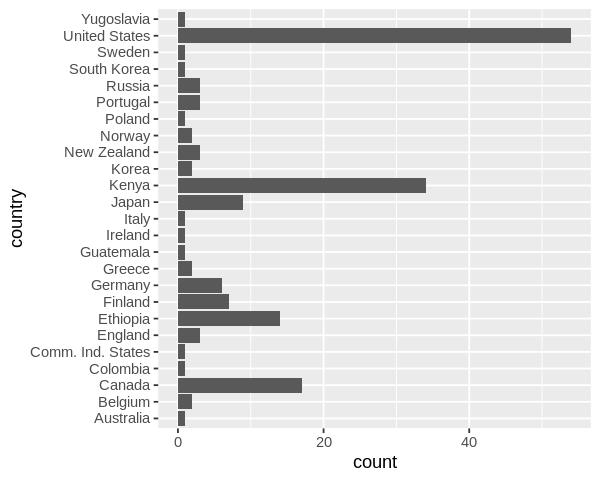

In [19]:
options(repr.plot.width = 5, repr.plot.height = 4)

p = ggplot(df, aes(x = country))

p = p + geom_bar() + coord_flip()

p

## Order by frequency

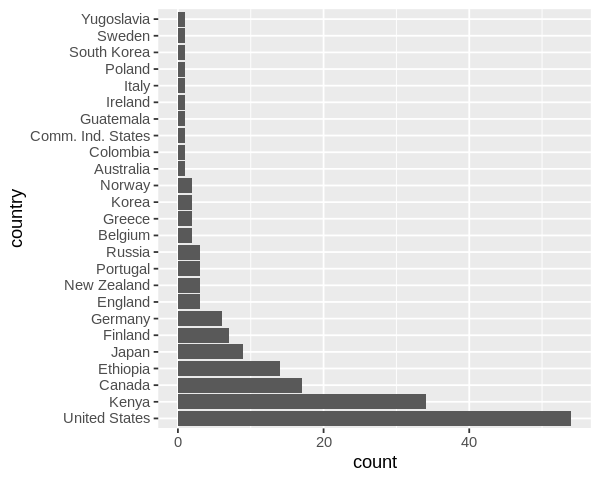

In [20]:
df.sorted = df %>%
    mutate(country = fct_infreq(country))

p = ggplot(df.sorted, aes(x = country))

p = p + geom_bar() + coord_flip()

p

## Lump low frequency categories

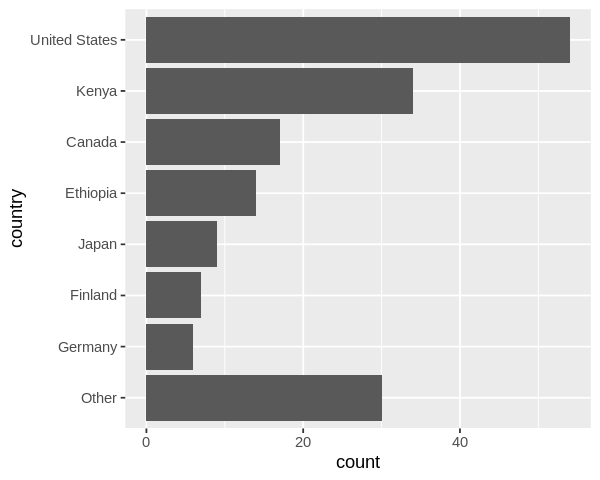

In [21]:
df.sorted = df %>%
    mutate(country = fct_infreq(country) %>% fct_lump(n = 7) %>% fct_rev)

p = ggplot(df.sorted, aes(x = country))

p = p + geom_bar() + coord_flip()

p

## Order by an aggregate value

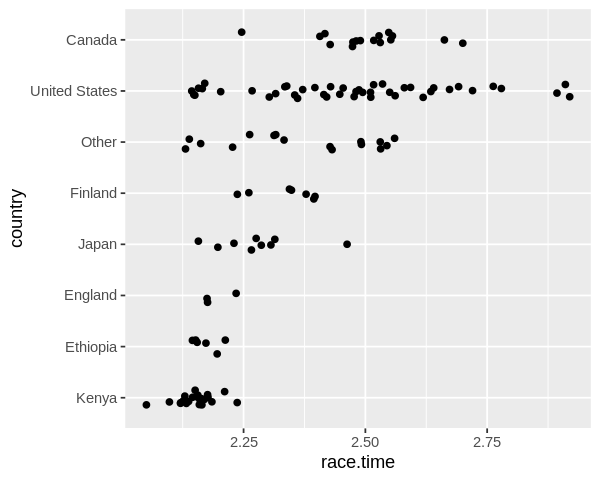

In [22]:
df.sorted = df %>%
    filter(MF == "Men's") %>%
    mutate(country = fct_lump(country, n = 7)) %>%
    mutate(country = fct_reorder(country, race.time, median))

p = ggplot(df.sorted, aes(x = country, y = race.time))

p = p + geom_point(position = position_jitter(h = 0, w = 0.15)) + coord_flip()

p